In [1]:
import pandas as pd
import numpy as np

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
img_size = 256
batch_size = 32
channels=3
epoches = 50

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\Lenovo\ds\datasets\potato_disease",
    shuffle=True,
    image_size = (img_size, img_size),
    batch_size = batch_size
)

Found 2152 files belonging to 3 classes.


In [5]:
dataset.class_names

['Potato_Early_blight', 'Potato_Late_blight', 'Potato_healthy']

In [6]:
class_names = dataset.class_names

In [7]:
for img_batch, label_batch in dataset.take(1):
    print(img_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 0 1 0 0 2 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1]


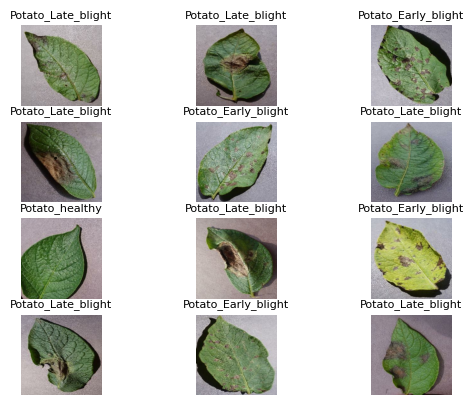

In [8]:
for img_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(4, 3, i+1)
        plt.imshow(img_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i].numpy()], fontsize=8)
        plt.axis("off")
        

In [9]:
len(dataset)

68

In [10]:
train_size = 0.8
train_len = len(dataset)*train_size
train_len

54.400000000000006

In [11]:
train_ds = dataset.take(516)
len(train_ds)

68

In [12]:
remain_ds = dataset.skip(516)
len(remain_ds)

0

In [13]:
len(remain_ds)*0.5

0.0

In [14]:
validation_ds = remain_ds.take(64)
len(validation_ds)

0

In [15]:
test_ds = remain_ds.skip(64)
len(test_ds)

0

In [16]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(ds_size * train_split)
    val_size = int(ds_size * val_split)
    test_size = int(ds_size * test_split)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(val_size).take(val_size)
    
    return train_ds, val_ds, test_ds

In [17]:
len(dataset)

68

In [18]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [19]:
len(train_ds)

54

In [20]:
len(val_ds)

6

In [21]:
len(test_ds)

6

In [22]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [23]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(img_size, img_size),
    layers.Rescaling(1./255),
])

In [24]:
resize_and_rescale = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vetical"),
    layers.RandomRotation(0.2),
])

In [25]:
input_shape = (batch_size, img_size ,img_size, channels)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    resize_and_rescale,
    layers.Conv2D(64, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


model.build(input_shape=input_shape)

C:\Users\Lenovo\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [26]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 2304)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 297,219 (1.13 MB)

 Trainable params: 297,219 (1.13 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [28]:
history = model.fit(
    train_ds,
    epochs = 10,
    batch_size = batch_size,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.4694 - loss: 5.7487 - val_accuracy: 0.7500 - val_loss: 0.6459
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.7598 - loss: 0.5793 - val_accuracy: 0.8542 - val_loss: 0.4350
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.8506 - loss: 0.4234 - val_accuracy: 0.8385 - val_loss: 0.3729
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.8716 - loss: 0.3138 - val_accuracy: 0.8229 - val_loss: 0.4338
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.8813 - loss: 0.2952 - val_accuracy: 0.9115 - val_loss: 0.2354
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.8968 - loss: 0.2783 - val_accuracy: 0.8906 - val_loss: 0.2677
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.9318 - loss: 0.1911 - val_accuracy: 0.9219 - val_loss: 0.1994
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.9381 - loss: 0.1624 - val_accuracy: 0.9323 - val_loss

In [29]:
scores = model.evaluate(test_ds)

6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 518ms/step - accuracy: 0.9041 - loss: 0.2848


In [30]:
scores

[0.34012091159820557, 0.890625]

In [31]:
history

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

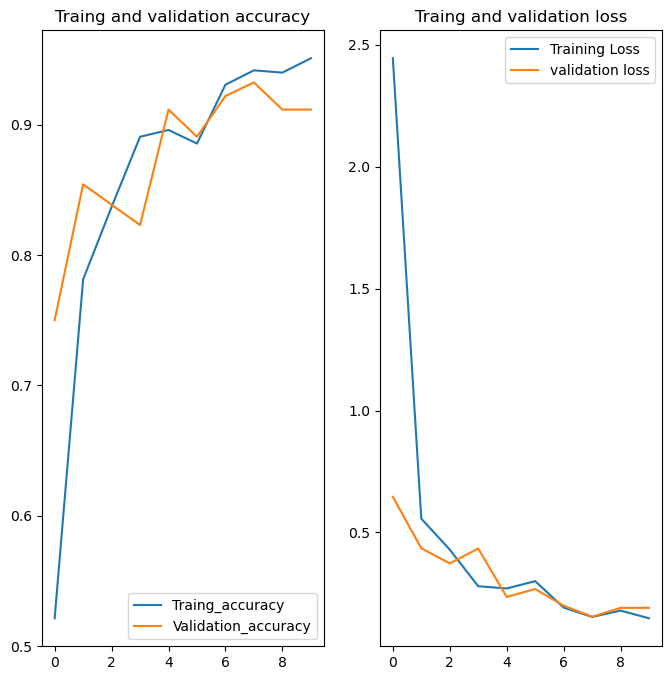

In [33]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(10), acc, label='Traing_accuracy')
plt.plot(range(10), val_acc, label='Validation_accuracy')
plt.legend(loc='lower right')
plt.title("Traing and validation accuracy")

plt.subplot(1,2,2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='validation loss')
plt.legend(loc='upper right')
plt.title("Traing and validation loss")
plt.show()

first image to predict
first image's actual label  Potato_Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 831ms/step
predicted  Potato_Late_blight


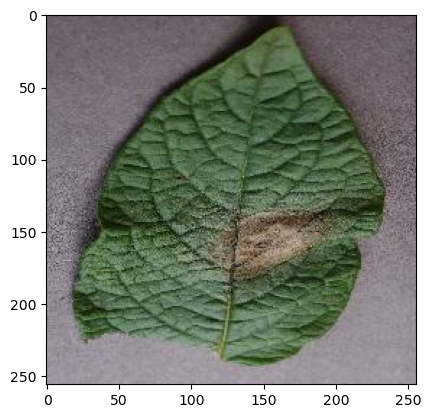

In [34]:
for image_batch, label in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label ", class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted ",class_names[np.argmax(batch_prediction[0])])
    

In [37]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


ValueError: num must be an integer with 1 <= num <= 9, not 10

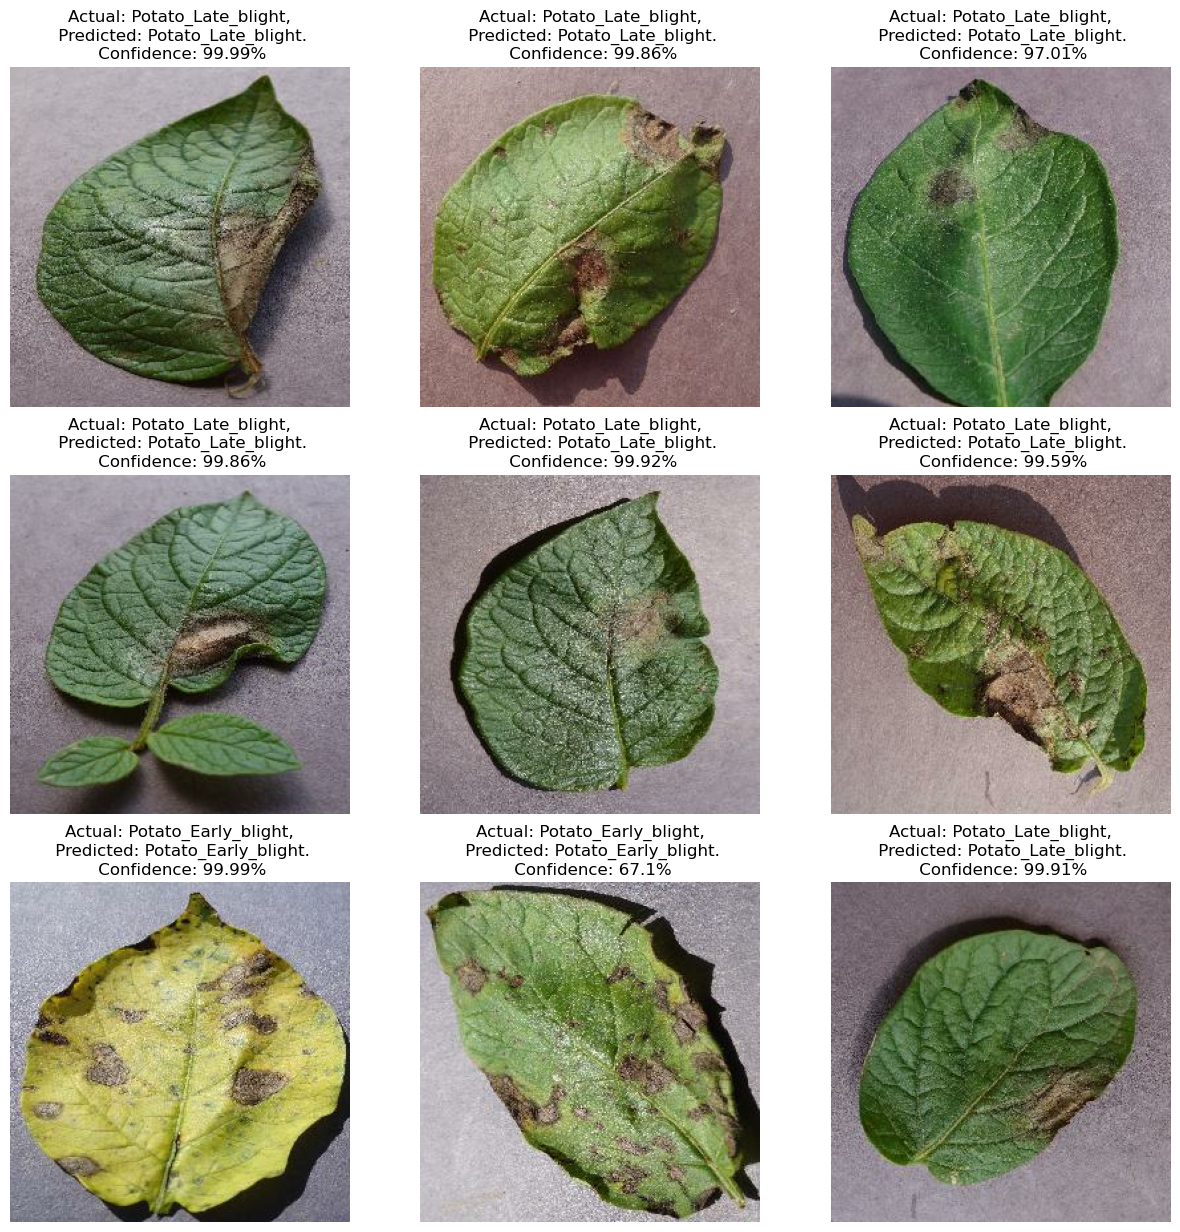

In [39]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(20):
        ax = plt.subplot(, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")